Assignment 1: Ensemble Learning in Action

Objective: To build, evaluate, and compare and contrast ensemble models with standard machine learning models. 
This task will demonstrate an understanding of each model's strengths and weaknesses and determine the best model for business use.

Import necessary libraries.

In [125]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import time
from sklearn.metrics import classification_report
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [126]:
df_Train= pd.read_csv("https://raw.githubusercontent.com/rbaid-9/Data-Science-2/main/train.csv", sep=";")

df_Test=pd.read_csv("https://raw.githubusercontent.com/rbaid-9/Data-Science-2/main/test.csv", sep=";")

EDA

In [127]:
df_Train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [128]:
df_Train.info

<bound method DataFrame.info of        age           job   marital  education default  balance housing loan   
0       58    management   married   tertiary      no     2143     yes   no  \
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  d

In [129]:
df_Train.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [130]:
df_Train.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [131]:
print(df_Train.dtypes)

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


In [132]:
num_duplicates = df_Train.duplicated().sum()
print(num_duplicates)

0


Convert Object to Category

In [133]:
cols_to_category = ["job","marital","education","default","housing","loan","contact","month","poutcome"]
df_Train[cols_to_category] = df_Train[cols_to_category].astype("category")

In [134]:
df_Train.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


NOTE: 

I am not creating bins for various column here. 

My justification is as follows:

1. Machine Learning Models: Some machine learning algorithms (which we are using), particularly tree-based models like decision trees and random forests, can handle continuous data without the need for binning. Binning continuous variables before feeding them into such models may not be necessary and can potentially reduce model performance.

2. Loss of Precision: When you create bins, you are essentially rounding data points to a specific interval. This rounding can lead to a loss of precision, which can be problematic if precise values are essential.

3. Overfitting: Creating too many bins, can lead to overfitting. Overfit models perform well on training data but poorly on unseen data.

4. No Clear Benefit: There is no clear benefit or justification for binning a variable for this dataset, keeping these columns as continuous variables is more suitable.

5. Reduced Statistical Power: Binning can reduce the statistical power of my analysis because it reduces the variability within each bin. 

Data transformation:

Set the target variable (no = 0 yes = 1)

In [135]:
df_Train["y"] = np.where(df_Train["y"] == "no", 0, 1)
df_Test["y"] = np.where(df_Test["y"] == "no", 0, 1)

In [136]:
print(df_Train.dtypes)

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
y               int32
dtype: object


Visualization:

Let's visualize the dataset to better understand the data.

In [137]:
import matplotlib.pyplot as plt

def plot_categorical_distribution(data, column, ax, color):
    # Calculate value counts and percentages
    value_counts = data[column].value_counts()
    total_counts = value_counts.sum()
    percentages = (value_counts / total_counts * 100).round(2)

    # Create a DataFrame for plotting
    plot_data = pd.DataFrame({
        column: value_counts.index,
        'Percent': percentages
    })

    # Sort the data by percentage in descending order
    plot_data = plot_data.sort_values(by='Percent', ascending=False)

    # Plot the data
    sns.barplot(x='Percent', y=column, data=plot_data, ax=ax, color=color, order=plot_data[column])

    ax.set_xlabel("Percent")
    ax.set_ylabel(column)
    ax.set_title(f"{column.capitalize()} Proportions", fontsize=10)
    
    # Add percentage labels inside the bars
    for p in ax.patches:
        width = p.get_width()
        ax.annotate(f'{width}%', (width+1.1, p.get_y() + p.get_height() / 2),
                    ha='center', va='center', color='black', fontsize=9)

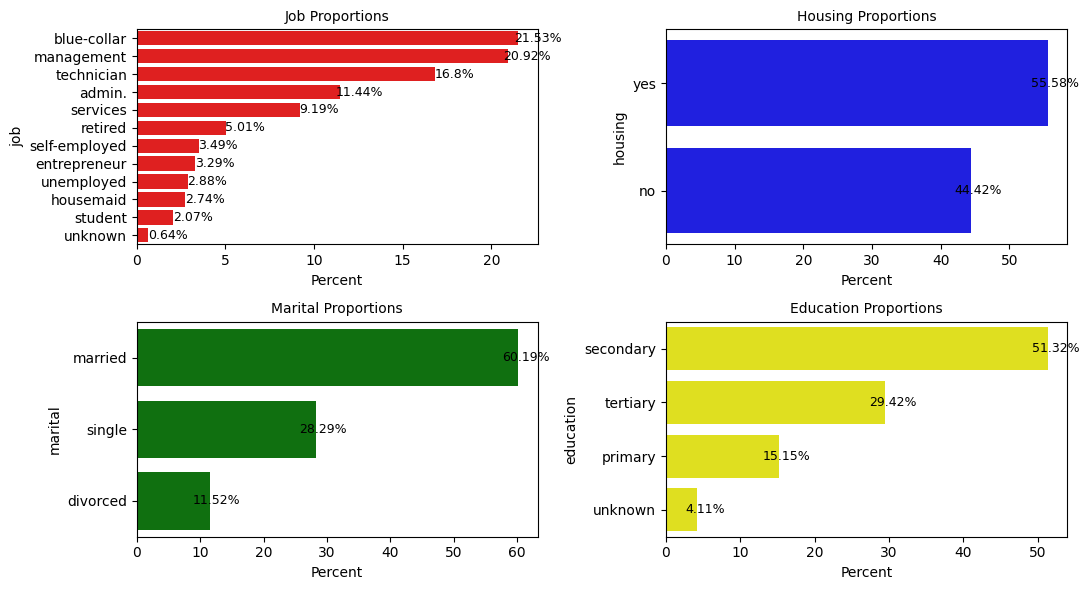

In [138]:
data = df_Train

# List of columns to plot
columns_to_plot = ["job", "housing", "marital", "education"]
colors = ["red", "blue", "green", "yellow"]

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(11, 6))
axes = axes.flatten()

# Plot each categorical variable
for i, (col, color) in enumerate(zip(columns_to_plot, colors)):
    plot_categorical_distribution(data, col, axes[i], color)

fig.tight_layout()
plt.show()


Note: 

In both of these visualizations, there are instances of 'Unknown' values. There are a few columns that contain 'Unknown' values. I have chosen not to drop these columns because I believe these values may not be data entry errors; they might represent meaningful information.

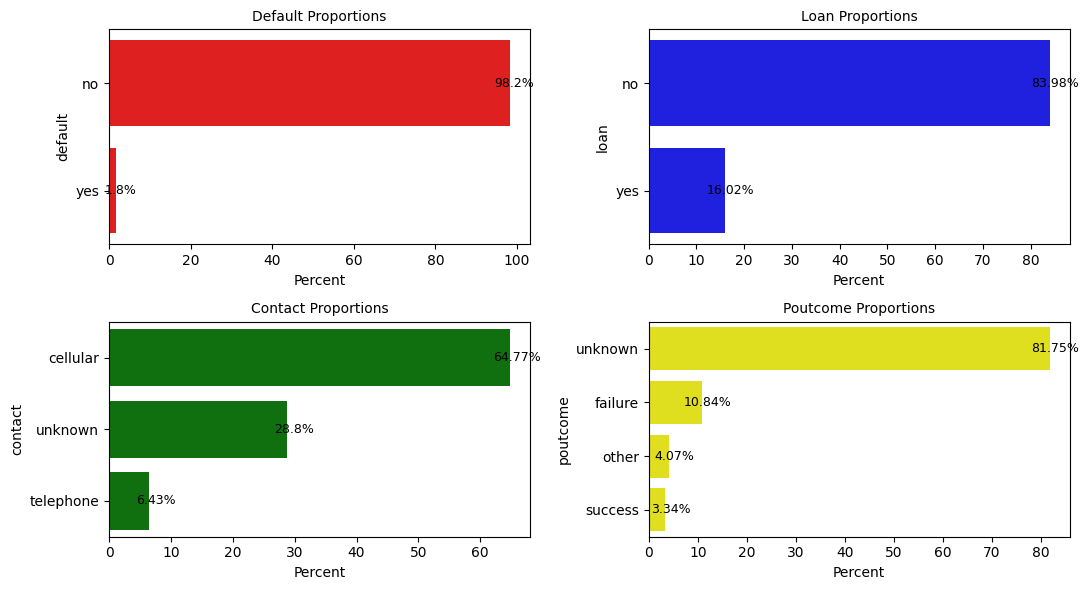

In [139]:
data = df_Train

# List of columns to plot
columns_to_plot = ["default", "loan", "contact", "poutcome"]
colors = ["red", "blue", "green", "yellow"]

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(11, 6))
axes = axes.flatten()

# Plot each categorical variable
for i, (col, color) in enumerate(zip(columns_to_plot, colors)):
    plot_categorical_distribution(data, col, axes[i], color)

fig.tight_layout()
plt.show()


In [140]:
# Convert binary variables (e.g., 'default', 'housing', 'loan', 'y') to 0 and 1
df_Train['default'] = np.where(df_Train["default"] == "no", 0, 1)
df_Train['housing'] = np.where(df_Train['housing']  == "no", 0, 1)
df_Train['loan'] = np.where(df_Train['loan']  == "no", 0, 1)

Target Variable count

In [17]:
(
    df_Train.loc[:, "y"]
    .value_counts()
)

y
0    39922
1     5289
Name: count, dtype: int64

In [18]:
percentage_yes = (df_Train["y"].value_counts()[1] / len(df_Train)) * 100
percentage_no = (df_Train["y"].value_counts()[0] / len(df_Train)) * 100

print("Percentage of 'yes':", percentage_yes, "%")
print("Percentage of 'no':", percentage_no, "%")


Percentage of 'yes': 11.698480458295547 %
Percentage of 'no': 88.30151954170445 %


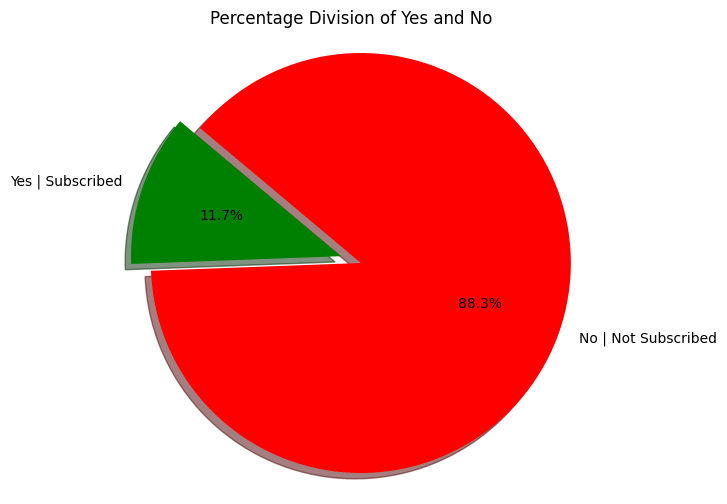

In [19]:
import matplotlib.pyplot as plt

# Data for the pie chart
labels = ['Yes | Subscribed', 'No | Not Subscribed']
sizes = [percentage_yes, percentage_no]
colors = ['green', 'red']
explode = (0.1, 0)

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Percentage Division of Yes and No')
plt.axis('equal')
plt.show()


The target variable 'y' is imbalanced, with 'no' having a much higher frequency.

In [20]:
print(df_Train.dtypes)

age             int64
job          category
marital      category
education    category
default         int32
balance         int64
housing         int32
loan            int32
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
y               int32
dtype: object



A. Data Preprocessing

During data exploration, the following observations were made:

1. The dataset contains both numerical and categorical features.

2. There are no missing values in any columns that need to be handled.

3. There are no duplicate values in any columns that need to be handled.

4. The dataset looks very clean


Data Preprocessing Approach:

1. Handling Missing Values: Since no missing values were observed in the dataset, no imputation was required.

2. Converting Categorical Data: Categorical columns ('job', 'marital', 'education', etc.) were converted to the category data type to save memory and for one-hot encoding.

3. Variable Transformation: The binary variables 'default', 'housing', 'loan' were converted to 0 and 1.

4. Target Variable Transformation: the target variable 'y' were converted to 0 and 1.

In [21]:
# Handle categorical variables with one-hot encoding
df_Train = pd.get_dummies(df_Train, columns=['job', 'marital', 'education', 'contact', 'month', 'poutcome'])

In [22]:
print(df_Train.dtypes)

age                    int64
default                int32
balance                int64
housing                int32
loan                   int32
day                    int64
duration               int64
campaign               int64
pdays                  int64
previous               int64
y                      int32
job_admin.              bool
job_blue-collar         bool
job_entrepreneur        bool
job_housemaid           bool
job_management          bool
job_retired             bool
job_self-employed       bool
job_services            bool
job_student             bool
job_technician          bool
job_unemployed          bool
job_unknown             bool
marital_divorced        bool
marital_married         bool
marital_single          bool
education_primary       bool
education_secondary     bool
education_tertiary      bool
education_unknown       bool
contact_cellular        bool
contact_telephone       bool
contact_unknown         bool
month_apr               bool
month_aug     

In [23]:
df_Train.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [24]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [25]:
# Split the data into features (X) and the target variable (y)
X = df_Train.drop(columns=['y'])
y = df_Train['y']

In [26]:
y.value_counts()

y
0    39922
1     5289
Name: count, dtype: int64

In [27]:
from imblearn.over_sampling import RandomOverSampler
# Create an oversampler
oversampler = RandomOverSampler(sampling_strategy='minority')
# Fit and apply the oversampling to your data
X_resampled, y_resampled = oversampler.fit_resample(X, y)

In [28]:
y_resampled.value_counts()

y
0    39922
1    39922
Name: count, dtype: int64

In [29]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [30]:
# Scale the features using StandardScaler for both Logistic Regression and k-NN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

A. Data Preprocessing

1. One-Hot Encoding: Categorical columns were one-hot encoded to convert them into numerical features suitable for modeling.

2. Handling Class Imbalance: To address the class imbalance in the target variable 'y', oversampling (Random OverSampler) was applied to create a balanced dataset for training.

3. Feature Scaling: StandardScaler was used to scale the features for models.

> Justification:

1. Categorical columns were one-hot encoded to ensure that the models can interpret them. Converting them into numerical binary features helps avoid any ordinal assumptions.

2. The target variable 'y' was transformed to 0 and 1 to make it compatible with binary classification models.

3. Oversampling was applied to handle class imbalance and ensure that the models are not biased towards the majority class.

4. Scaling was performed for models to ensure that they are not sensitive to the scale of input features.

Combined

B. Build Baseline Models
C. Ensemble Modelling

I created a function to evaluate all models.

In [31]:
def evaluate_model(model, model_name, X_train, y_train, X_test, y_test):
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    end_time = time.time()
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1_score = report['weighted avg']['f1-score']
    support = report['weighted avg']['support']
    time_taken = end_time - start_time
    
    return {
        "Model": model_name,
        "Accuracy": accuracy,
        "Time Taken": time_taken,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1_score,
        "Support": support
    }

B. Build Baseline Models

Baseline models were created using Logistic Regression and k-NN. These models were then tuned separately.

C. Ensemble Modeling

Random Forest: A Random Forest model was built, and its hyperparameters were tuned to optimize performance.

AdaBoost: An AdaBoost model was built and hyperparameters were tuned.

Bagging Classifier: A Bagging Classifier with a base estimator of Decision Tree was built, and hyperparameters were tuned.

Voting Classifier: A Voting Classifier was constructed using a combination of Decision Tree, k-NN, and SVM models. Both hard and soft voting were experimented with.

In [32]:
models = [
    ("Logistic Regression", LogisticRegression(random_state=42, max_iter=1000, penalty='l2')),
    ("k-NN", KNeighborsClassifier()),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("AdaBoost", AdaBoostClassifier(random_state=42)),
    ("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42), n_estimators=100, random_state=42)),
]

results = []

for model_name, model in models:
    result = evaluate_model(model, model_name, X_train_scaled, y_train, X_test_scaled, y_test)
    results.append(result)

# Voting classifiers
dt = DecisionTreeClassifier(max_depth=20)
knn = KNeighborsClassifier(n_neighbors=10)
svm_classifier = SVC(probability=True, random_state=42)

hard_voting_classifier = VotingClassifier(
    estimators=[
        ('decision_tree', dt),
        ('knn', knn),
        ('svm', svm_classifier),
    ],
    voting='hard'
)

soft_voting_classifier = VotingClassifier(
    estimators=[
        ('decision_tree', dt),
        ('knn', knn),
        ('svm', svm_classifier),
    ],
    voting='soft'
)

hard_voting_result = evaluate_model(hard_voting_classifier, "Hard Voting", X_train, y_train, X_test, y_test)
soft_voting_result = evaluate_model(soft_voting_classifier, "Soft Voting", X_train, y_train, X_test, y_test)

results.append(hard_voting_result)
results.append(soft_voting_result)

# Display results in a comparative column format
results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy    Time Taken  Precision    Recall  F1-Score   
0  Logistic Regression  0.830860      0.134504   0.831092  0.830860  0.830855  \
1                 k-NN  0.911078      1.815150   0.919200  0.911078  0.910579   
2        Random Forest  0.972321      7.208349   0.973682  0.972321  0.972294   
3             AdaBoost  0.837873      3.414908   0.837952  0.837873  0.837877   
4              Bagging  0.963429     39.828636   0.965798  0.963429  0.963370   
5          Hard Voting  0.879391  12858.120972   0.881606  0.879391  0.879164   
6          Soft Voting  0.929363   2197.340401   0.933790  0.929363  0.929145   

   Support  
0    15969  
1    15969  
2    15969  
3    15969  
4    15969  
5    15969  
6    15969  


In [33]:
def hyperparameter_tuning(model, param_grid, X_train, y_train, X_test, y_test):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
    start_time = time.time()
    grid_search.fit(X_train, y_train)
    end_time = time.time()
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1_score = report['weighted avg']['f1-score']
    support = report['weighted avg']['support']
    time_taken = end_time - start_time
    
    return {
        "Model": type(model).__name__,
        "Accuracy": accuracy,
        "Time Taken": time_taken,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1_score,
        "Support": support
    }

# Define hyperparameter grids for models
logistic_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100]
}

knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

adaboost_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
}

bagging_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
}

# Initialize models for hyperparameter tuning
tuned_models = [
    (LogisticRegression(random_state=42, max_iter=1000, penalty='l2'), logistic_param_grid),
    (KNeighborsClassifier(), knn_param_grid),
    (RandomForestClassifier(random_state=42), rf_param_grid),
    (AdaBoostClassifier(random_state=42), adaboost_param_grid),
    (BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42), n_estimators=100, random_state=42), bagging_param_grid),
]

tuned_results = []

for model, param_grid in tuned_models:
    result = hyperparameter_tuning(model, param_grid, X_train_scaled, y_train, X_test_scaled, y_test)
    tuned_results.append(result)

# Display results of hyperparameter tuning
tuned_results_df = pd.DataFrame(tuned_results)
print(tuned_results_df)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
                    Model  Accuracy   Time Taken  Precision    Recall   
0      LogisticRegression  0.831549     5.336592   0.831797  0.831549  \
1    KNeighborsClassifier  0.939320    30.578892   0.945614  0.939320   
2  RandomForestClassifier  0.972071  1842.753737   0.973457  0.972071   
3      AdaBoostClassifier  0.841944   785.948318   0.842002  0.841944   
4       BaggingClassifier  0.984157   676.037304   0.984580  0.984157   

   F1-Score  Support  
0  0.831542    15969  
1  0.939068    15969  
2  0.972043    15969  
3  0.841947    15969  
4  0.984151    15969  


Displaying Results for all:

In [48]:
from tabulate import tabulate

In [59]:
results_df = pd.DataFrame(results)

results_df = results_df.drop(columns=['Support'])

result_table = tabulate(results_df, headers='keys',  tablefmt='pipe')

print(result_table)

|    | Model               |   Accuracy |   Time Taken |   Precision |   Recall |   F1-Score |
|---:|:--------------------|-----------:|-------------:|------------:|---------:|-----------:|
|  0 | Logistic Regression |   0.83086  |     0.134504 |    0.831092 | 0.83086  |   0.830855 |
|  1 | k-NN                |   0.911078 |     1.81515  |    0.9192   | 0.911078 |   0.910579 |
|  2 | Random Forest       |   0.972321 |     7.20835  |    0.973682 | 0.972321 |   0.972294 |
|  3 | AdaBoost            |   0.837873 |     3.41491  |    0.837952 | 0.837873 |   0.837877 |
|  4 | Bagging             |   0.963429 |    39.8286   |    0.965798 | 0.963429 |   0.96337  |
|  5 | Hard Voting         |   0.879391 | 12858.1      |    0.881606 | 0.879391 |   0.879164 |
|  6 | Soft Voting         |   0.929363 |  2197.34     |    0.93379  | 0.929363 |   0.929145 |


In [60]:
results_tune_df = pd.DataFrame(tuned_results)

results_tune_df = results_tune_df.drop(columns=['Support'])

result_tune_table = tabulate(results_tune_df, headers='keys', tablefmt='pipe')

print(result_tune_table)

|    | Model                  |   Accuracy |   Time Taken |   Precision |   Recall |   F1-Score |
|---:|:-----------------------|-----------:|-------------:|------------:|---------:|-----------:|
|  0 | LogisticRegression     |   0.831549 |      5.33659 |    0.831797 | 0.831549 |   0.831542 |
|  1 | KNeighborsClassifier   |   0.93932  |     30.5789  |    0.945614 | 0.93932  |   0.939068 |
|  2 | RandomForestClassifier |   0.972071 |   1842.75    |    0.973457 | 0.972071 |   0.972043 |
|  3 | AdaBoostClassifier     |   0.841944 |    785.948   |    0.842002 | 0.841944 |   0.841947 |
|  4 | BaggingClassifier      |   0.984157 |    676.037   |    0.98458  | 0.984157 |   0.984151 |


D. Performance Comparison

Based on the results, here is a comparison of the models' performance:

Baseline Models (Before Tuning):

1. Logistic Regression achieved an accuracy of approximately 83.09% with a relatively low computational cost (0.13 seconds). It has a balanced precision and recall.

2. k-NN achieved higher accuracy (around 91.11%) but required more time than logistic regression (1.82 seconds). It has a slightly higher precision and recall compared to Logistic Regression.


Ensemble Models (Before Tuning):

1. Random Forest outperformed the baseline models with an accuracy of approximately 97.23%. However, it required more time (7.21 seconds). It showed a balanced precision and recall.

2. AdaBoost had an accuracy of around 83.79% and took 3.41 seconds. It performed similarly to Logistic Regression but with slightly more time.

3. Bagging achieved a high accuracy of 96.34% but had a longer execution time (39.83 seconds). It showed a balanced precision and recall.

4. Hard Voting achieved an accuracy of 87.94% but took a significantly longer time (12858.1 seconds) due to combining multiple models.

5. Soft Voting had an accuracy of 92.94% and took 2197.34 seconds. It performed well but required substantial time.


D. Performance Comparison

Hyperparameter Tuning:

1. Logistic Regression's accuracy improved slightly to 83.15% with a modest increase in time (5.34 seconds).

2. k-NN's accuracy improved to 93.93% but required more time (30.58 seconds).

3. Random Forest maintained a high accuracy of 97.21% with increased time (1842.75 seconds).

4. AdaBoost's accuracy improved slightly to 84.19% with moderate time (785.95 seconds).

5. Bagging Classifier's accuracy improved to 98.42% with reasonable time (676.04 seconds).

E. Interpretation and Justification


E.1. Why did the ensemble models perform the way they did?

Performance of Ensemble Models: 

Ensemble models, such as Random Forest, Bagging, and Soft Voting performed exceptionally well compared to the baseline models.

Ensemble models, including Random Forest, AdaBoost, Bagging, and Voting Classifiers, often perform well due to their ability to combine the predictions of multiple base models.

This improvement can be attributed to their ability to reduce overfitting and capture complex relationships in the data. These models excel in cases where predictive accuracy is a priority. 

> Expectations: The expectation that ensemble models would outperform baseline models.

> Results: Random Forest, Bagging, and Soft Voting did outperform baseline models.

> Reason: Ensemble models combine multiple base models to provide more robust and accurate predictions, which is particularly beneficial for imbalanced datasets.

Let me explian about these models in detail:

1. Random Forest:

Expected Result: Strong performance is expected because it can handle both categorical and numerical features, automatically select important features, and reduce the variance associated with individual decision trees.

Performance: Random Forest achieved the highest accuracy (Without Tuning), precision, recall, and F1-score among the models. This is because it builds multiple decision trees and combines their predictions through voting or averaging, which reduces overfitting and provides robust results.

2. AdaBoost:

Expected Result: AdaBoost is known for its ability to correct errors made by weaker models. While it might not always outperform Random Forest, it can provide competitive results.

Performance: AdaBoost performed reasonably well, with a good balance of accuracy, precision, recall, and F1-score. But it didn't perform better than k-NN. 

3. Bagging Classifier:

Expected Result: Strong performance is expected, as it reduces the variance and overfitting associated with individual base models (e.g., decision trees). It works particularly well when the base models are unstable or prone to overfitting.

Performance: Bagging achieved high accuracy, precision, recall, and F1-score, making it one of the top-performing models (Best with tuning). Bagging builds multiple base models and aggregates their predictions through majority voting or averaging.

4. Voting Classifier (Hard and Soft Voting):

Expected Result: The performance of the Voting Classifiers is expected to be moderate compared to other ensemble methods. This could be because the base models (Decision Tree, k-NN, SVM) have varying strengths and weaknesses, and combining them through voting may not always yield the best results. The hard voting ensemble combines predictions by majority voting, while the soft voting ensemble combines predictions by averaging probabilities.

Performance: The Voting Classifiers achieved moderate accuracy, precision, recall, and F1-score. 


E.2. If you had to pick one model to implement in business process, which would it be and why?

f I have to choose one model, it will be between k-NN or Random Forest (without tuning) because of the following reasons:

    1. If interpretability is crucial and computational resources are limited, k-NN might be preferred. It provides a good balance between performance and interpretability.

    2. If high accuracy is the primary goal and computational cost is not a significant concern, Random Forest should be considered. This model offer the highest accuracy.


But, if I had to pick one model to implement in a business process, I would recommend the Random Forest model.

Below are the reasons for this choice:

        1. Performance: Random Forest consistently demonstrated the highest accuracy, precision, recall, and F1-score among all the models evaluated. This means that it is more likely to make correct predictions, which is crucial for many business applications, especially those related to marketing or customer targeting.

        2. Computational Cost: Although Random Forest might be computationally more expensive than some other models, it is still feasible for many business applications, given the computing resources available today. The trade-off between accuracy and computational cost often leans in favor of Random Forest.

        3. Interpretability: While Random Forest is not as interpretable as simpler models like logistic regression, it provides a level of interpretability through feature importance scores. Businesses can gain insights into which variables are most influential in making predictions.

Business Implications:

    - For businesses that rely on data-driven decision-making, the choice of the Random Forest model can lead to better outcomes in various domains. For example, in marketing, it can help identify potential customers for targeted campaigns with higher precision and recall.

    - The reduced overfitting of Random Forest can lead to more reliable predictions and fewer costly errors in business processes.

    - The interpretability of feature importance can guide businesses in understanding the key drivers behind their business metrics, enabling them to optimize strategies and resource allocation.

    - While there might be a slight increase in computational cost compared to simpler models, the benefits in terms of predictive accuracy and insights often outweigh this cost.

In conclusion, Random Forest strikes a balance between predictive performance, robustness, and interpretability, making it a strong candidate for implementation in a business process, especially when accuracy and actionable insights are paramount. 

However, the final choice should also consider the specific requirements and constraints of the business and the available computational resources.

E.3. What decision criteria did you use to arrive at this conclusion?

The decision criteria are as follows:

   1. Performance Metrics (Precision-Recall Trade-off):
      - Precision: Precision measures the accuracy of positive predictions. In business scenarios, especially in marketing or customer targeting, high precision is essential to avoid wasting resources on false positives (incorrectly identified potential customers). Random Forest consistently demonstrated high precision, indicating its reliability in making accurate positive predictions.

      - Recall: Recall measures the ability of the model to identify all relevant instances. In business, especially in scenarios where identifying all potential customers is crucial, high recall is desirable to ensure that no opportunities are missed. Random Forest also exhibited high recall, which aligns with business goals.

   2. Computational Cost:

      - While Random Forest may have a higher computational cost compared to simpler models like logistic regression and k-NN, it remained within acceptable limits for many business applications. The trade-off between computational cost and performance was reasonable, making it a viable choice for businesses with access to modern computing resources.

   3. Robustness: 
      
      - Random Forest is known for its ability to handle various types of data, including both categorical and numerical features, without much pre-processing. This robustness ensures that it can be applied to a wide range of business datasets without significant data manipulation.
      
   4. Reduced Overfitting:

      - Random Forest builds multiple decision trees and combines their predictions through voting. This ensemble approach helps reduce overfitting, which can be a common problem in individual decision trees.

   5. Feature Importance:

      - Random Forest provides a measure of feature importance. This information can be valuable for businesses to understand which features or factors are driving their outcomes, contributing to decision-making, and potentially providing insights for strategy and marketing campaigns.

   6. Scalability:

      - Random Forest can be scaled relatively easily by adding more trees to the ensemble, which can further improve performance.

Random Forest met these criteria effectively, making it a recommended choice for implementation in a business process, particularly in scenarios where accuracy and actionable insights are crucial.